# продолжитеельность 3

In [133]:
! wget https://www.dropbox.com/s/2xbg7gha4owwyfe/data.xlsx?dl=0

--2022-05-26 15:13:22--  https://www.dropbox.com/s/2xbg7gha4owwyfe/data.xlsx?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2xbg7gha4owwyfe/data.xlsx [following]
--2022-05-26 15:13:23--  https://www.dropbox.com/s/raw/2xbg7gha4owwyfe/data.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc06d2f8d9eb6c6b921d4f8acf2f.dl.dropboxusercontent.com/cd/0/inline/BmAq67aV6Qfi7HSrMwnifa6-eigkhTnZ8xcYlqNNfapT5JEA3KbsKzVjTxDI9mox_oBwfoTgKDi7I0BecUlAt2KhC_-kb8S7JcU6TCRlKa3FQqwwl8kqijc4lQky2eT29yiZmI_u14muMLBWu78m66l9FBnW0hervvsU3rqpMMxeZA/file# [following]
--2022-05-26 15:13:23--  https://uc06d2f8d9eb6c6b921d4f8acf2f.dl.dropboxusercontent.com/cd/0/inline/BmAq67aV6Qfi7HSrMwnifa6-eigkhTnZ8xcYlqNNfapT5JEA3KbsKzVjTxDI9mox_oBwfoTg

In [134]:
import pandas as pd
import numpy as np


In [135]:
data = pd.read_excel('data.xlsx?dl=0', sheet_name=2)


In [136]:
data

,date,fut price,exp fut,DateExp,Strike,shift,IV real,IV,share price,rate,exp option,Unnamed: 11,div date,time till div,div
0,43523,18059.142454,1.060274,43910,18000,64,0.199670,0.199670,205.40,0.00752,1.054795,43908,43571,0.131507,18.681516
1,43524,21287.000000,1.057534,43910,21250,15,0.234543,0.199670,207.80,0.00749,1.052055,43908,43571,0.128767,18.681973
2,43525,21131.907517,1.054795,43910,21250,15,0.233394,0.199670,206.54,0.00738,1.049315,43908,43571,0.126027,18.682616
3,43528,20007.000000,1.046575,43910,20000,10,0.259623,0.199670,205.50,0.00732,1.041096,43908,43571,0.117808,18.683881
4,43529,20350.000000,1.043836,43910,20250,11,0.242435,0.199670,202.92,0.00737,1.038356,43908,43571,0.115068,18.684148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,43901,19433.000000,0.024658,43910,19500,8,1.283998,0.779455,194.53,0.00640,0.019178,43908,43908,0.019178,0.000000
260,43902,17598.000000,0.021918,43910,17500,0,1.290139,1.290139,175.91,0.00697,0.016438,43908,43908,0.016438,0.000000
261,43903,19822.000000,0.019178,43910,19750,9,1.086523,1.290139,198.60,0.00676,0.013699,43908,43908,0.013699,0.000000
262,43906,19633.000000,0.010959,43910,19750,9,1.086523,1.290139,195.85,0.00702,0.005479,43908,43908,0.005479,0.000000


In [137]:
data['share price']=(data['share price']-data['div'])*100


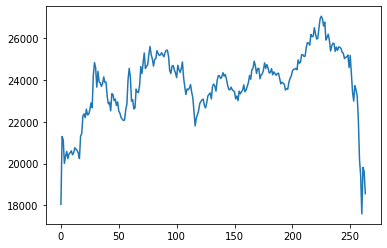

In [138]:
plt.plot(data['fut price'])

In [139]:
import pandas as pd
from scipy.stats import norm
"""Создаем функцию, которая считает цену фьючерса при различных сценариях"""
import math
def future_change(price,strike,time,r,std):
    changes=[]
    change=0
    changes.append(0)
    changes.append(0)
    changes.append(price*(1+1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+std)*np.exp(time*r)-strike)
    changes.append(price*(1+std)*np.exp(time*r)-strike)
    changes.append(price*(1-std)*np.exp(time*r)-strike)
    changes.append(price*(1-std)*np.exp(time*r)-strike)
    changes.append((price*(1+2*std)*np.exp(time*r)-strike)*0.35)
    changes.append((price*(1-2*std)*np.exp(time*r)-strike)*0.35)
    

    
    return changes
    

In [140]:
"""Создаем функцию, которая считает цену опциона"""
def option_price_share(price, strike, IV, time, r, put=False):
    ln=math.log(price/strike)
    d1=(r+(IV**2)/2)*time
    d2=(r-(IV**2)/2)*time
    denom=IV*math.sqrt(time)
    Nd1=norm.cdf((ln+d1)/denom, loc=0, scale=1)
    Nd2=norm.cdf((ln+d2)/denom, loc=0, scale=1)
    Nd_1=norm.cdf(-(ln+d1)/denom, loc=0, scale=1)
    Nd_2=norm.cdf(-(ln+d2)/denom, loc=0, scale=1)
    option=price*Nd1-strike*math.exp(-r*time)*Nd2
    if put:
        option=strike*math.exp(-r*time)*Nd_2-price*Nd_1
    return option

In [141]:
"""Создаем функцию, которая считает цену опциона при различных сценариях"""
def option_change(price, strike, IV, time, r, basic_std, delta_std, put=False):
    sc1=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price, strike, IV+delta_std, time, r, put=False)
    sc2=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price, strike, IV-delta_std, time, r, put=False)
    sc3=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+1/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc4=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+1/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc5=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-1/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc6=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-1/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc7=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc8=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc9=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc10=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2/3*basic_std, strike, IV-delta_std, time, r, put=False)
    sc11=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc12=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc13=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc14=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc15=(option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2*basic_std*price, strike, IV, time, r, put=False))*0.35
    sc16=(option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2*basic_std*price, strike, IV, time, r, put=False))*0.35
    changes=[-sc1,-sc2,-sc3,-sc4,-sc5,-sc6,-sc7,-sc8,-sc9,-sc10,-sc11,-sc12,-sc13,-sc14,-sc15,-sc16]
    if put:
        sc1=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price, strike, IV+delta_std, time, r, put=True)
        sc2=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price, strike, IV-delta_std, time, r, put=True)
        sc3=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+1/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc4=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+1/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc5=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-1/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc6=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-1/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc7=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc8=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc9=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc10=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2/3*basic_std, strike, IV-delta_std, time, r, put=True)
        sc11=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc12=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc13=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc14=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc15=(option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2*basic_std*price, strike, IV, time, r, put=True))*0.35
        sc16=(option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2*basic_std*price, strike, IV, time, r, put=True))*0.35
        changes=[-sc1,-sc2,-sc3,-sc4,-sc5,-sc6,-sc7,-sc8,-sc9,-sc10,-sc11,-sc12,-sc13,-sc14,-sc15,-sc16]
    return changes

In [142]:

def constrained_partitions(n, k, min_elem, max_elem,step):
    allowed = range(max_elem, min_elem-1, step)

    def helper(n, k, t):
        if k == 0:
            if n == 0:
                yield t
        elif k == 1:
            if n in allowed:
                yield t + (n,)
        elif min_elem * k <= n <= max_elem * k:
            for v in allowed:
                yield from helper(n - v, k - 1, t + (v,))

    return helper(n, k, ())

In [143]:

sale_fut = [] # здесь будут все возможные стратегии ликвидации фьючерсных контрактов
for p in constrained_partitions(1000, 3, 0, 500,-50):
  sale_fut.append(p)

In [144]:
def loss_calc(st, day):
  ls = 0
  q_c = [-1000,-1000,-1000,0]
  q_p = [1000,1000,1000,0]
  for k in range(len(sale_fut[st])):
    ls+=(1000-sale_fut[st][k])*(data['fut price'][day+k]-data['fut price'][day])
    
  ls+=-1000*(option_price_share(data['share price'][day+4],data['Strike'][day], data['IV'][day+4],
                                data['exp option'][day+4], data['rate'][day+4], put=False)-
             option_price_share(data['share price'][day],data['Strike'][day], data['IV'][day],
                                data['exp option'][day], data['rate'][day], put=False))
  ls+=1000*(option_price_share(data['share price'][day+4],data['Strike'][day], data['IV'][day+4],
                                data['exp option'][day+4], data['rate'][day+4], put=True)-
             option_price_share(data['share price'][day],data['Strike'][day], data['IV'][day],
                                data['exp option'][day], data['rate'][day], put=True))
  return ls


In [145]:



q_c = [-1000,-1000,0]
q_p = [1000,1000,0]
sale_call=[0,0,1000]
sale_put=[0,0,1000]
margins = [] # маржинальные требования по всему ряду
margins1=[]
final_losses=[] #фактические убытки по всему ряду
final_losses1=[]
sale_fut_n = [500,500,0] # наивная стратегия ликвидации фьючерсов
#for d in range(0, data.shape[0],5): # идем по массиву данных с интервалом 5 дней
sum_lt_naive=[]
opt_strat=[]
opt_strat1=[]
#for d in range(0, 5,5):
for d in range(0, 260,4): # идем по массиву данных с интервалом 5 дней
  risk_final_scenarios=[] # убытки по дням по всем стратегиям
  sum_lt = [] # маржа по всем стратегиям
  sum_lt_u=[]
  sum_lt_u1=[]
  sum_losses = [] 
  r=data['rate'][d]
  fut_strike=data['fut price'][d]
  option_strike=data['Strike'][d]
  price = data['fut price'][d]
  price_f=data['share price'][d]
  IV = data['IV'][d]
  fut_time = data['exp fut'][d]
  option_time = data['exp option'][d]
  
  print(d)
  lr=0
  lt=[]
  lt_u=[]
  lt_u1=[]
  losses=[]
  call_price0 = option_price_share(price, option_strike, IV, option_time,r)
  put_price0 = option_price_share(price, option_strike, IV, option_time,r, put=True)

  lt_naive = [] # убытки по дням для наивной стратегии
  #std=0.01
  std = 388.780488
  delta_std=0.15
  scenarios_fut=[]
  scenarios_put=[]
  scenarios_call=[]
  q_fut_n=1000
  for i in range(1,len(sale_fut_n)+1): # перебираем все дни внутри наивной стратегии
  #for i in range(1,2):
    lnr=0
    
    
    s = 0.01809
    delta_s=0.075
    std=s*np.sqrt(i)
    delta_std=delta_s*np.sqrt(i)
    fut_time=max(0.00000000000001,fut_time - (i)/365)
    option_time=max(0.00000000000001, option_time-(i)/365)
    std_lnr=s*np.sqrt(i+1)
    delta_std_lnr=delta_s*np.sqrt(i+1)
    fut_time_lnr=max(0.00000000000001,fut_time - (i+1)/365)
    option_time_lnr=max(0.00000000000001, option_time-(i+1)/365)
    q_fut_n=q_fut_n-sale_fut_n[i-1]
    #print(i)
    #print(price-2*std*price)

    scenarios_fut.append(future_change(price_f,fut_strike,fut_time,r,std))
    scenarios_call.append(option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False))
    scenarios_put.append(option_change(price, option_strike, IV, option_time, r, std, delta_std, put=True))
    #print('scenario, call', scenarios_call)
    """

    lnr=min([sum(a) for a in zip(*[[k*q_fut_n for k in future_change(price,fut_strike,fut_time_lnr,r,std_lnr)],
                                  [h*q_c[i-1] for h in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=False)],
                                  [v*q_p[i-1] for v in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=True)]])])
    """
    #print(q_fut_n)
    #print(q_c[i-1])
    #print(sale_fut_n[i-1])
    lnr=min([sum(a) for a in zip(*[[k*q_fut_n for k in scenarios_fut[i-1]],
                                 [h*q_c[i-1] for h in scenarios_call[i-1]],
                                 [v*q_p[i-1] for v in scenarios_put[i-1]]])])
    
    #print([k*q_fut_n for k in future_change(price,fut_strike,fut_time_lnr,r,std_lnr)])
    #print([h*q_c[i-1] for h in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=False)])
    #print([v*q_p[i-1] for v in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=True)])
    
    #print(lnr)

    lr+=min([sum(b) for b in zip(*[[k*sale_fut_n[i-1] for k in scenarios_fut[i-1]],
                                        [h*sale_call[i-1] for h in scenarios_call[i-1]],
                                        [h*sale_put[i-1] for h in scenarios_put[i-1]]])])
    """
    lr+=min([sum(b) for b in zip(*[[k*sale_fut_n[i-1] for k in future_change(price,fut_strike,fut_time,r,std)],
                                        [h*sale_call[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)],
                                        [h*sale_call[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)]])])
    """
    #print(lr)
    lt_naive.append(lr+lnr)

    
  sum_lt_naive.append(sum(lt_naive))
  print('naive', sum(lt_naive))
  lr=0
  lr_real=0
  
  for j in range(0,len(sale_fut)): # перебираем все возможные стратегии
  #for j in range(0,1):
    risk_final_max=[] # наихудшие убытки внутри стратегии
    lnr=0
    lr=0
    lr_u=0
    lnr_real=0
    lr_real=0

    q_fut=1000
    std=0.01
    delta_std=0.005
    lt=[]
    lt_u=[]
    lt_u1=[]
    losses=[]
    for i in range(1,len(sale_fut[j])+1): # перебираем все дни внутри одной стратегии
    #for i in range(1,2):
        
        std=std+i*0.001
        delta_std=delta_std+(i)*0.001
        fut_time=max(0.00000000000001,fut_time - (i)/365)
        option_time=max(0.00000000000001, option_time-(i)/365)
        std_lnr=std+(i+1)*0.001
        delta_std_lnr=delta_std+(i+1)*0.001
        fut_time_lnr=max(0.00000000000001,fut_time - (i+1)/365)
        option_time_lnr=max(0.00000000000001, option_time-(i+1)/365)
        q_fut=q_fut-sale_fut[j][i-1]
        
        
        #lnr=min([sum(a) for a in zip(*[[k*q_fut for k in future_change(price,fut_strike,fut_time_lnr,r,std_lnr)],
        #                          [h*q_c[i-1] for h in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=False)],
        #                          [v*q_p[i-1] for v in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=True)]])])
        lnr=min([sum(a) for a in zip(*[[k*q_fut for k in scenarios_fut[i-1]],
                                 [h*q_c[i-1] for h in scenarios_call[i-1]],
                                 [v*q_p[i-1] for v in scenarios_put[i-1]]])])
        #if j ==0:
          #print(q_fut)
          #print(q_c[i-1])
          #print(sale_fut[j][i-1])

        lnr_real = q_fut*(data['fut price'][d+i+1]-data['fut price'][d])
        +q_c[i-1]*(option_price_share(data['fut price'][d+i+1], option_strike, data['IV'][d+i+1], option_time,data['rate'][d+i+1])-call_price0)
        +q_p[i-1]*(option_price_share(data['fut price'][d+i+1], option_strike, data['IV'][d+i+1], option_time,data['rate'][d+i+1], put=True)-put_price0)
        #print('real', data['fut price'][d+i+1]-data['fut price'][d])
        #print('real',option_price_share(data['fut price'][d+i+1], option_strike, data['IV'][d+i+1], option_time,data['rate'][d+i+1])-call_price0)
        
        #lr+=min([sum(b) for b in zip(*[[k*sale_fut[j][i-1] for k in future_change(price,fut_strike,fut_time,r,std)],
        #                                [h*sale_call[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)],
        #                                [h*sale_put[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=True)]])])
        lr=min([sum(b) for b in zip(*[[k*sale_fut[j][i-1] for k in scenarios_fut[i-1]],
                                        [h*sale_call[i-1] for h in scenarios_call[i-1]],
                                        [h*sale_put[i-1] for h in scenarios_put[i-1]]])])
        lr_u+=min([sum(b) for b in zip(*[[k*sale_fut[j][i-1] for k in scenarios_fut[i-1]],
                                        [h*sale_call[i-1] for h in scenarios_call[i-1]],
                                        [h*sale_put[i-1] for h in scenarios_put[i-1]]])])
        
        lr_real+= sale_fut[j][i-1]*(data['fut price'][d+i]-data['fut price'][d])
        +q_c[i-1]*(option_price_share(data['fut price'][d+i], option_strike, data['IV'][d+i], option_time,data['rate'][d+i])-call_price0)
        +q_p[i-1]*(option_price_share(data['fut price'][d+i], option_strike, data['IV'][d+i], option_time,data['rate'][d+i], put=True)-put_price0)
          
        lt_u.append(lr_u+lnr)

        lt.append(lr_u+lnr)
        lt_u1.append(lr)
        losses.append(lr_real+lnr_real)
        

    sum_lt_u.append(sum(lt_u))
    sum_lt_u1.append(sum(lt_u1))   
    sum_lt.append(sum(lt)) # добавили сумму прогнозируемых убытков по этой стратегии, это и есть маржа
    #print(sum_lt)
    sum_losses.append(sum(losses)) # добавили сумму фактических убытков по этой стратегии
    
  opt_strat.append(np.argmax(sum_lt_u))
  opt_strat1.append(np.argmax(sum_lt_u1))
  margins.append(sum_lt[opt_strat[-1]])
  margins1.append(sum_lt[opt_strat1[-1]])
  print('core naive', sum_lt[0])
  print('core', margins[-1])
  print('core1',margins1[-1])
  
  #print(np.argmax(sum_lt))
  #print()
  final_losses.append(sum_losses[opt_strat[-1]])
  final_losses1.append(sum_losses[opt_strat1[-1]])
  print('real1', sum_losses[opt_strat1[-1]])
  print('real', sum_losses[opt_strat[-1]])
  


0
naive -2434344.1385664796
core naive -2434344.1385664796
core -1905693.7148847159
core1 -1905693.7148847159
real1 8326026.397336445
real 8326026.397336445
4
naive -9179279.274141004
core naive -9179279.274141004
core -8669860.314138282
core1 -9065485.0486386
real1 220514.4883637
real 248209.87592424953
8
naive -9055415.111886397
core naive -9055415.111886397
core -8550053.604729246
core1 -8993207.091301609
real1 -13567.435251201823
real -16667.204675841276
12
naive -9547462.249698672
core naive -9547462.249698672
core -9019008.817662362
core1 -9378145.165031945
real1 -328665.9344291944
real -445770.42425107525
16
naive -7386426.952331202
core naive -7386426.952331202
core -6894239.209400521
core1 -7336190.364075959
real1 3485800.0
real 4291300.0
20
naive -11863844.47822057
core naive -11863844.47822057
core -11328228.803928144
core1 -11802690.040885642
real1 49416.04882380126
real 43716.74164022987
24
naive -10627435.450936107
core naive -10627435.450936107
core -10086477.334958887
c

In [146]:
proboi =0
fail=0
for i in range(0, len(final_losses)):
  
  if final_losses[i]<margins[i]:
    proboi+=1
  
  if margins[i]<sum_lt_naive[i]:
    fail+=1

In [147]:
proboi

1

In [148]:
fail

0

In [149]:
proboi =0
fail=0
for i in range(0, len(final_losses)):
  
  if final_losses1[i]<margins1[i]:
    proboi+=1
  if margins1[i]<sum_lt_naive[i]:
    fail+=1

In [150]:
proboi

1

In [151]:
fail

0

In [152]:
len(final_losses)

65

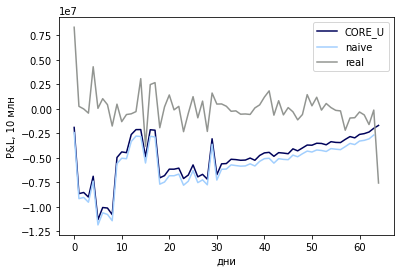

In [153]:
import matplotlib.pyplot as plt 
plt.plot(margins, color='xkcd:dark blue', label='CORE_U')
plt.plot(sum_lt_naive[:-1], color='xkcd:baby blue',label='naive')
plt.plot(final_losses, color='xkcd:grey', label='real')
plt.xlabel('дни')
plt.ylabel('P&L, 10 млн')
plt.legend()
plt.show()


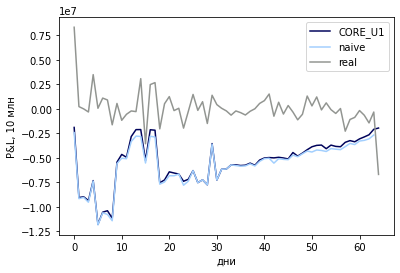

In [154]:
import matplotlib.pyplot as plt 
plt.plot(margins1, color='xkcd:dark blue', label='CORE_U1')
plt.plot(sum_lt_naive[:-1], color='xkcd:baby blue',label='naive')
plt.plot(final_losses1, color='xkcd:grey', label='real')
plt.xlabel('дни')
plt.ylabel('P&L, 10 млн')
plt.legend()
plt.show()


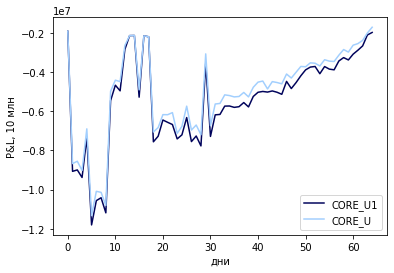

In [155]:
plt.plot(margins1, color='xkcd:dark blue', label='CORE_U1')
#plt.plot(sum_lt_naive, color='xkcd:baby blue',label='naive')
plt.plot(margins, color='xkcd:baby blue', label='CORE_U')
plt.xlabel('дни')
plt.ylabel('P&L, 10 млн')
plt.legend()
plt.show()